In [1]:
%matplotlib inline
import math as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pd.set_option("display.max_columns", 200)

In [2]:
#Configuração para as figuras
from IPython.core.pylabtools import figsize
figsize(10, 8)
plt.figure(dpi=150)
sns.set()

<Figure size 1500x1200 with 0 Axes>

In [3]:
#Importação dos dados e criação do dataframe principal
df_enem_train = pd.read_csv("train.csv")
df_enem_test = pd.read_csv('test.csv')

In [4]:
df_enem_train.head(3)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [5]:
#Seleção inicial realizada com base no Dicionário de Micro Dados Enem 2016
features_selecionadas = ['SG_UF_RESIDENCIA','NU_IDADE','TP_ST_CONCLUSAO','TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO', 'Q006', 'Q025', 'Q026', 'Q027','Q047']

In [6]:
#Criação de dataframe com as features selecionadas e visualização dos primeiros 3 dados de cada coluna visível
df_enem_train_features = df_enem_train[features_selecionadas]
df_enem_train_features.head(3)

,SG_UF_RESIDENCIA,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q006,Q025,Q026,Q027,Q047
0,RS,24,1,1,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0,C,A,C,H,A
1,CE,17,2,2,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0,B,A,A,NaN,A
2,CE,21,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,A,A,NaN,A


In [7]:
#Visualização dos primeiros 3 dados de cada coluna visível
df_enem_test.head(3)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A


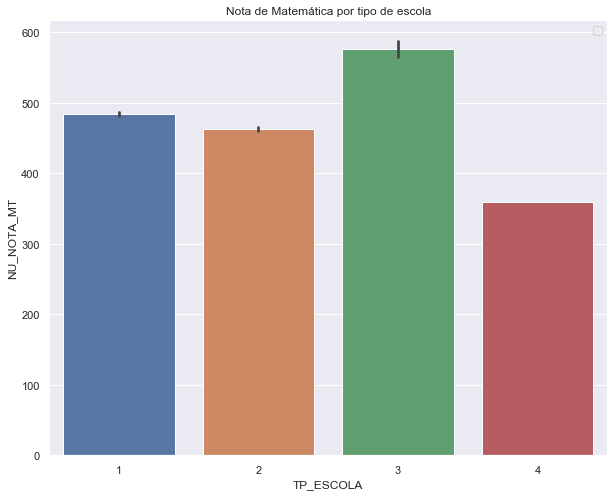

In [8]:
sns.barplot(df_enem_train_features.TP_ESCOLA, df_enem_train_features.NU_NOTA_MT)
plt.title("Nota de Matemática por tipo de escola")
plt.legend(df_enem_train_features["TP_ESCOLA"],("Não Respondeu", "Pública", "Privada","Exterior"))
plt.show()

In [9]:
df_enem_train_features.corr()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.253403,-0.296328,-0.056171,-0.001611,-0.024979,-0.061485,-0.102243,-0.114181,-0.104293,-0.110452,-0.086709,-0.116125
TP_ST_CONCLUSAO,-0.253403,1.000000,0.156222,-0.111134,-0.139415,-0.117616,-0.087869,-0.105647,-0.110186,-0.114245,-0.117711,-0.089861,-0.120580
TP_ESCOLA,-0.296328,0.156222,1.000000,0.083383,0.052710,0.037254,0.069304,0.059108,0.084441,0.079996,0.068909,0.071172,0.082520
NU_NOTA_CN,-0.056171,-0.111134,0.083383,1.000000,0.609543,0.545667,0.584941,0.357672,0.412894,0.429447,0.407747,0.416349,0.459938
NU_NOTA_CH,-0.001611,-0.139415,0.052710,0.609543,1.000000,0.692988,0.529594,0.443809,0.488050,0.510452,0.488797,0.494798,0.550582
NU_NOTA_LC,-0.024979,-0.117616,0.037254,0.545667,0.692988,1.000000,0.494695,0.430603,0.453262,0.475390,0.467356,0.441696,0.512908
NU_NOTA_MT,-0.061485,-0.087869,0.069304,0.584941,0.529594,0.494695,1.000000,0.299402,0.335638,0.350307,0.342282,0.343337,0.379376
NU_NOTA_COMP1,-0.102243,-0.105647,0.059108,0.357672,0.443809,0.430603,0.299402,1.000000,0.756664,0.759452,0.824538,0.558587,0.862744
NU_NOTA_COMP2,-0.114181,-0.110186,0.084441,0.412894,0.488050,0.453262,0.335638,0.756664,1.000000,0.875447,0.808006,0.655915,0.918278
NU_NOTA_COMP3,-0.104293,-0.114245,0.079996,0.429447,0.510452,0.475390,0.350307,0.759452,0.875447,1.000000,0.827151,0.664350,0.925813


In [10]:
df_enem_train_vars_num = df_enem_train_features[['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']]

In [11]:
df_enem_train_vars_num

,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,24,1,1,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,17,2,2,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,21,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,20,1,1,438.2,419.7,394.5,403.2,120.0,120.0,80.0,80.0,40.0,440.0
13726,33,1,1,423.8,557.9,533.0,452.4,120.0,120.0,120.0,120.0,80.0,560.0
13727,15,3,1,460.5,528.9,569.3,398.0,120.0,120.0,120.0,120.0,120.0,600.0
13728,36,4,1,422.5,621.7,569.0,386.6,100.0,100.0,80.0,80.0,100.0,460.0


In [12]:
df_enem_train_vars_num.isna().sum()

NU_IDADE              0
TP_ST_CONCLUSAO       0
TP_ESCOLA             0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

In [13]:
df_enem_train_vars_num.dtypes

NU_IDADE             int64
TP_ST_CONCLUSAO      int64
TP_ESCOLA            int64
NU_NOTA_CN         float64
NU_NOTA_CH         float64
NU_NOTA_LC         float64
NU_NOTA_MT         float64
NU_NOTA_COMP1      float64
NU_NOTA_COMP2      float64
NU_NOTA_COMP3      float64
NU_NOTA_COMP4      float64
NU_NOTA_COMP5      float64
NU_NOTA_REDACAO    float64
dtype: object

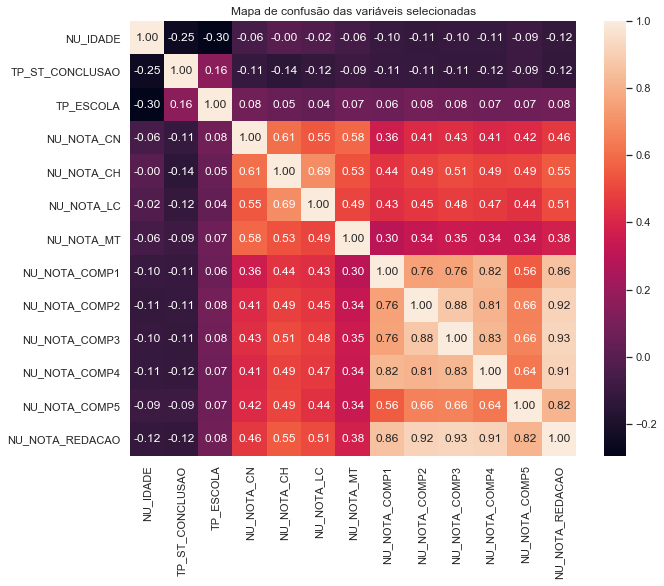

In [14]:
#Mapa de correlação das variáveis selecionadas
sns.heatmap(df_enem_train_vars_num.corr(), annot=True, fmt='0.2f')
plt.title("Mapa de confusão das variáveis selecionadas")
plt.show()

In [19]:
#Tratamento de todas as variáveis numéricas com valor missing
for value in range(len(df_enem_train_vars_num.columns)):
    df_enem_train_vars_num.iloc[ : , value].fillna(df_enem_train_vars_num.iloc[ : , value].mean(), inplace=True)

In [16]:
#Verificação de quantidade de valores nulos no novo dataframe
df_enem_train_vars_num.isna().sum()

NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ESCOLA          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

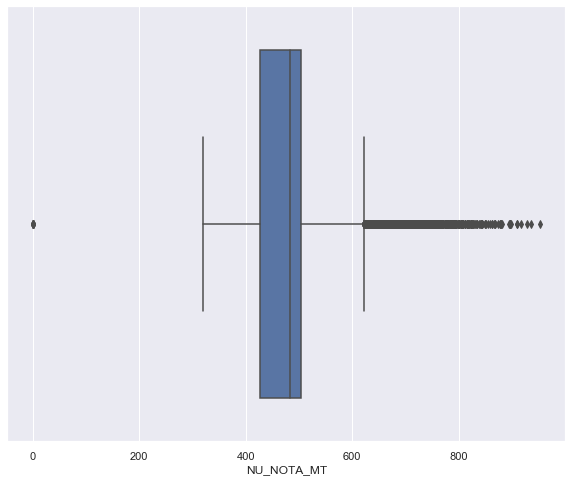

In [271]:
#Boxplot das notas de matemática do conjunto de treino
sns.boxplot(df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

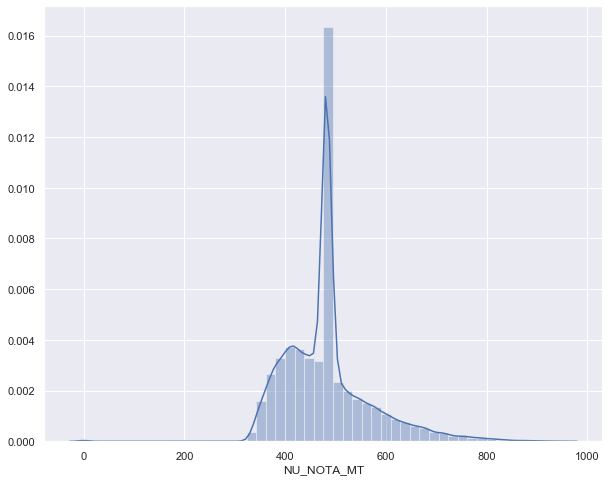

In [272]:
#Distribuição das notas de matemática do conjunto de treino
sns.distplot(df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

In [17]:
#Retirada das provas com valores zerados
for nota in range(len(df_enem_train_vars_num.columns)):
    df_enem_train_vars_num.iloc[ : , nota] = df_enem_train_vars_num[df_enem_train_vars_num.iloc[ : , nota] > 0].round(3)

In [20]:
df_enem_train_vars_num.isna().sum()

NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ESCOLA          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [21]:
df_enem_train_vars_num.iloc[ : , 6].describe()

count    13730.000000
mean       482.849621
std         84.762559
min        320.500000
25%        426.225000
50%        482.498000
75%        504.400000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [22]:
df_enem_train_vars_num.describe(), df_enem_train_vars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_IDADE         13730 non-null  int64  
 1   TP_ST_CONCLUSAO  13730 non-null  int64  
 2   TP_ESCOLA        13730 non-null  int64  
 3   NU_NOTA_CN       13730 non-null  float64
 4   NU_NOTA_CH       13730 non-null  float64
 5   NU_NOTA_LC       13730 non-null  float64
 6   NU_NOTA_MT       13730 non-null  float64
 7   NU_NOTA_COMP1    13730 non-null  float64
 8   NU_NOTA_COMP2    13730 non-null  float64
 9   NU_NOTA_COMP3    13730 non-null  float64
 10  NU_NOTA_COMP4    13730 non-null  float64
 11  NU_NOTA_COMP5    13730 non-null  float64
 12  NU_NOTA_REDACAO  13730 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 1.4 MB


(           NU_IDADE  TP_ST_CONCLUSAO     TP_ESCOLA    NU_NOTA_CN  \
 count  13730.000000     13730.000000  13730.000000  13730.000000   
 mean      21.593809         1.782666      1.353532    473.736643   
 std        7.043654         0.880734      0.558472     60.764179   
 min       13.000000         1.000000      1.000000    344.800000   
 25%       17.000000         1.000000      1.000000    432.700000   
 50%       19.000000         2.000000      1.000000    473.495000   
 75%       23.000000         2.000000      2.000000    493.200000   
 max       67.000000         4.000000      4.000000    806.400000   
 
          NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_COMP1  NU_NOTA_COMP2  \
 count  13730.000000  13730.000000  13730.000000   13730.000000   13730.000000   
 mean     529.776822    516.736332    482.849621     121.961430     113.915476   
 std       63.501873     57.843400     84.762559      19.995677      24.823649   
 min      324.400000    306.000000    320.500000 

In [23]:
df_enem_train_vars_num.isna().sum()

NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ESCOLA          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [25]:
scaler = StandardScaler().fit(df_enem_train_vars_num[["NU_NOTA_MT"]])
df_enem_train_scaled = scaler.fit_transform(df_enem_train_vars_num)
df_enem_train_scaled

array([[ 0.34162361, -0.88868424, -0.63305803, ..., -1.45801288,
        -0.0458221 , -0.16502732],
       [-0.65221498,  0.24677404,  1.15760673, ...,  0.19577947,
        -0.0458221 ,  0.37018536],
       [-0.08430721,  1.38223231, -0.63305803, ..., -0.08850743,
        -0.12690436, -0.08431725],
       ...,
       [-0.93616886,  1.38223231, -0.63305803, ...,  0.19577947,
         1.18830677,  0.54858959],
       [ 2.04534692,  2.51769059, -0.63305803, ..., -1.45801288,
         0.57124234, -0.70024   ],
       [-0.65221498,  0.24677404,  1.15760673, ...,  0.19577947,
        -0.0458221 , -0.16502732]])

In [26]:
df_enem_train_vars_objt = df_enem_train[["SG_UF_RESIDENCIA", "Q006", "Q025", "Q026", "Q027", "Q047"]]

In [27]:
df_enem_train_vars_objt

,SG_UF_RESIDENCIA,Q006,Q025,Q026,Q027,Q047
0,RS,C,A,C,H,A
1,CE,B,A,A,NaN,A
2,CE,C,A,A,NaN,A
3,RJ,E,B,C,F,D
4,AM,C,A,B,F,A
...,...,...,...,...,...,...
13725,SP,G,B,B,C,A
13726,PE,C,B,B,I,A
13727,RS,B,B,A,NaN,A
13728,RJ,G,B,C,E,A


In [28]:
sorted(df_enem_train_vars_objt["SG_UF_RESIDENCIA"].value_counts())

[33,
 67,
 73,
 108,
 167,
 183,
 187,
 210,
 232,
 258,
 271,
 272,
 273,
 274,
 292,
 316,
 502,
 556,
 593,
 594,
 619,
 637,
 804,
 912,
 1374,
 1785,
 2138]

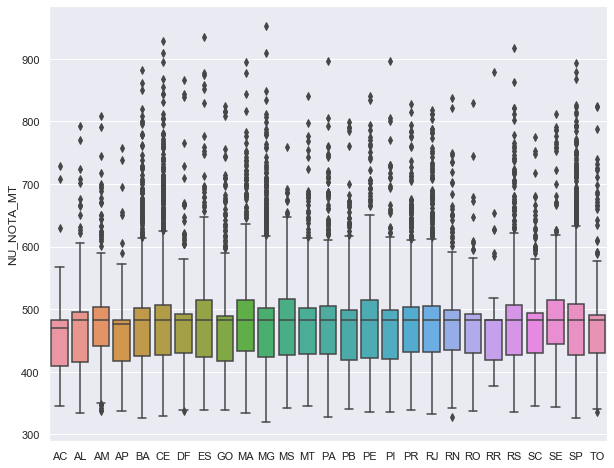

In [29]:
sns.boxplot(sorted(df_enem_train_vars_objt["SG_UF_RESIDENCIA"]), df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

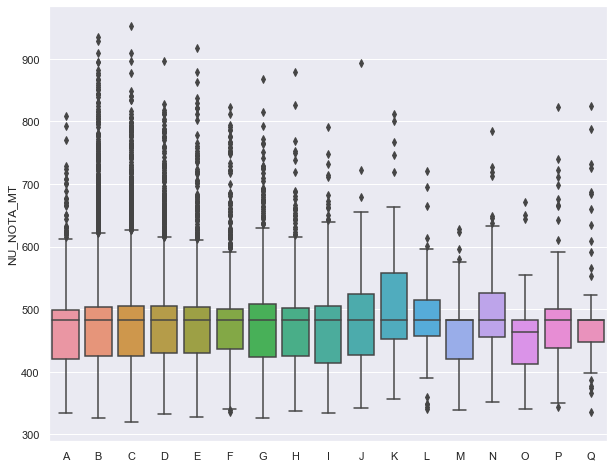

In [290]:
sns.boxplot(sorted(df_enem_train_vars_objt["Q006"]), df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

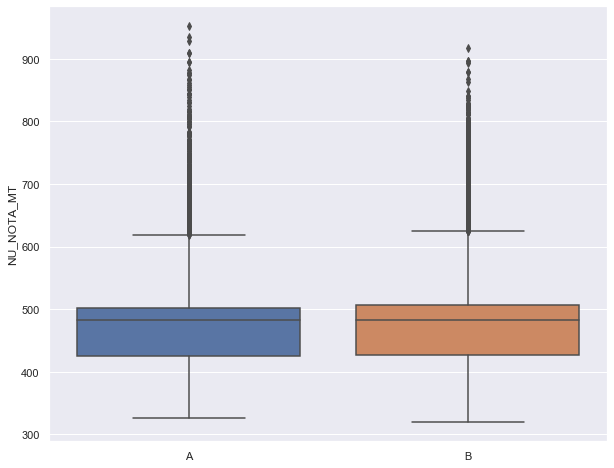

In [291]:
sns.boxplot(sorted(df_enem_train_vars_objt["Q025"]), df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

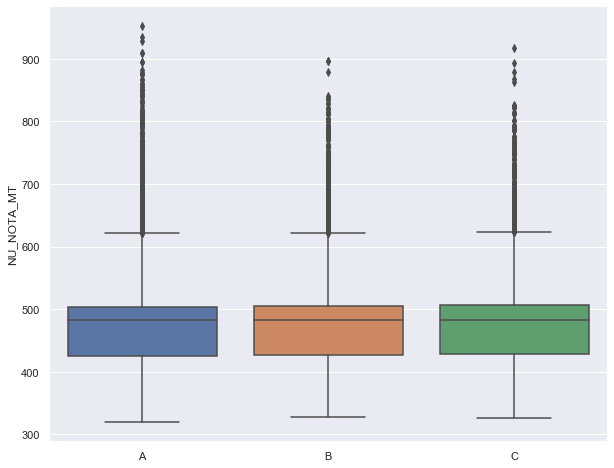

In [292]:
sns.boxplot(sorted(df_enem_train_vars_objt["Q026"]), df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

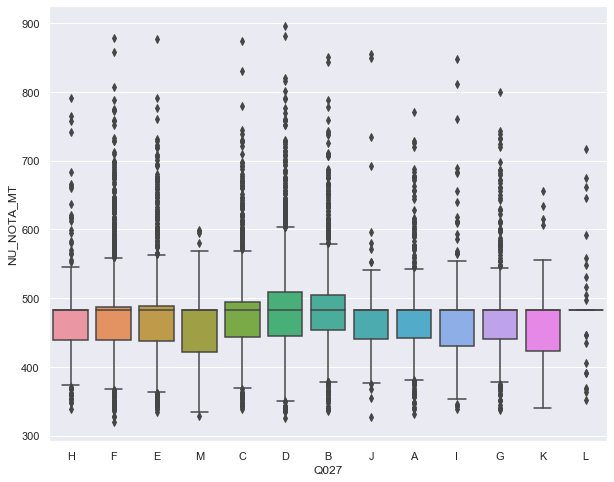

In [293]:
sns.boxplot(df_enem_train_vars_objt["Q027"], df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

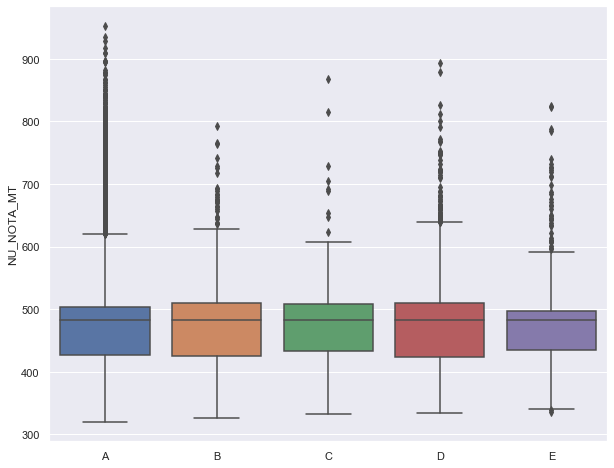

In [294]:
sns.boxplot(sorted(df_enem_train_vars_objt["Q047"]), df_enem_train_vars_num.NU_NOTA_MT)
plt.show()

In [30]:
one_hot_enco = OneHotEncoder(sparse=False)
df_enem_features_Q025 = one_hot_enco.fit_transform(df_enem_train_vars_objt[["Q025"]])
df_enem_features_Q025 = pd.DataFrame(df_enem_features_Q025, columns=['Q025_ACESSO_INTERNET_NAO','Q025_ACESSO_INTERNET_SIM'])
df_enem_features_Q025

,Q025_ACESSO_INTERNET_NAO,Q025_ACESSO_INTERNET_SIM
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
13725,0.0,1.0
13726,0.0,1.0
13727,0.0,1.0
13728,0.0,1.0


In [31]:
one_hot_enco = OneHotEncoder(sparse=False)
df_enem_features_Q047 = one_hot_enco.fit_transform(df_enem_train_vars_objt[["Q047"]])
df_enem_features_Q047 = pd.DataFrame(df_enem_features_Q047, columns=['Q047_SOM_PUBL','Q047_PUBL/PRIV_SEM_BOLSA', 'Q047_PUBL/PRIV_COM_BOLSA', 'Q047_SOM_PRIV_SEM_BOLSA', 'Q047_SOM_PRIV_COM_BOLSA'])
df_enem_features_Q047

,Q047_SOM_PUBL,Q047_PUBL/PRIV_SEM_BOLSA,Q047_PUBL/PRIV_COM_BOLSA,Q047_SOM_PRIV_SEM_BOLSA,Q047_SOM_PRIV_COM_BOLSA
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
13725,1.0,0.0,0.0,0.0,0.0
13726,1.0,0.0,0.0,0.0,0.0
13727,1.0,0.0,0.0,0.0,0.0
13728,1.0,0.0,0.0,0.0,0.0


In [32]:
one_hot_enco = OneHotEncoder(sparse=False)
df_enem_features_Q006 = one_hot_enco.fit_transform(df_enem_train_vars_objt[["Q006"]])
df_enem_features_Q006 = pd.DataFrame(df_enem_features_Q006, columns=["Q006_A_NENHUMA_RENDA", "Q006_B_ATE_880" , "Q006_C_880_A_1320", "Q006_D_1320_A_1760", "Q006_E_1760_A_2200", "Q006_F_2200_A_2640", "Q006_G_2640_A_3520", "Q006_H_3520_A_4400", "Q006_I_4400_A_5280", "Q006_J_5280_A_6160", "Q006_K_6160_A_7040", "Q006_L_7040_A_7920","Q006_M_7920_A_8800", "Q006_N_8800_A_10560", "Q006_O_10560_A_13200", "Q006_P_13200_A_17600", "Q006_Q_+_17600"])
df_enem_features_Q006

,Q006_A_NENHUMA_RENDA,Q006_B_ATE_880,Q006_C_880_A_1320,Q006_D_1320_A_1760,Q006_E_1760_A_2200,Q006_F_2200_A_2640,Q006_G_2640_A_3520,Q006_H_3520_A_4400,Q006_I_4400_A_5280,Q006_J_5280_A_6160,Q006_K_6160_A_7040,Q006_L_7040_A_7920,Q006_M_7920_A_8800,Q006_N_8800_A_10560,Q006_O_10560_A_13200,Q006_P_13200_A_17600,Q006_Q_+_17600
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13726,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_enem_train_vars_concat_num_obj = pd.concat([df_enem_train_vars_num, df_enem_features_Q006, df_enem_features_Q025, df_enem_features_Q047], axis=1)
df_enem_train_vars_concat_num_obj

,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q006_A_NENHUMA_RENDA,Q006_B_ATE_880,Q006_C_880_A_1320,Q006_D_1320_A_1760,Q006_E_1760_A_2200,Q006_F_2200_A_2640,Q006_G_2640_A_3520,Q006_H_3520_A_4400,Q006_I_4400_A_5280,Q006_J_5280_A_6160,Q006_K_6160_A_7040,Q006_L_7040_A_7920,Q006_M_7920_A_8800,Q006_N_8800_A_10560,Q006_O_10560_A_13200,Q006_P_13200_A_17600,Q006_Q_+_17600,Q025_ACESSO_INTERNET_NAO,Q025_ACESSO_INTERNET_SIM,Q047_SOM_PUBL,Q047_PUBL/PRIV_SEM_BOLSA,Q047_PUBL/PRIV_COM_BOLSA,Q047_SOM_PRIV_SEM_BOLSA,Q047_SOM_PRIV_COM_BOLSA
0,24,1,1,436.300,495.400,581.200,399.400,120.000,120.000,120.000,80.000,80.000,520.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17,2,2,474.500,544.100,599.000,459.800,140.000,120.000,120.000,120.000,80.000,580.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21,3,1,473.495,529.661,516.473,482.498,119.812,111.916,106.824,113.124,77.372,529.048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,25,1,1,473.495,529.661,516.473,482.498,119.812,111.916,106.824,113.124,77.372,529.048,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28,1,1,473.495,529.661,516.473,482.498,119.812,111.916,106.824,113.124,77.372,529.048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,20,1,1,438.200,419.700,394.500,403.200,120.000,120.000,80.000,80.000,40.000,440.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13726,33,1,1,423.800,557.900,533.000,452.400,120.000,120.000,120.000,120.000,80.000,560.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13727,15,3,1,460.500,528.900,569.300,398.000,120.000,120.000,120.000,120.000,120.000,600.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13728,36,4,1,422.500,621.700,569.000,386.600,100.000,100.000,80.000,80.000,100.000,460.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [116]:
df_enem_train_vars_concat_num_obj

,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q006_A_NENHUMA_RENDA,Q006_B_ATE_880,Q006_C_880_A_1320,Q006_D_1320_A_1760,Q006_E_1760_A_2200,Q006_F_2200_A_2640,Q006_G_2640_A_3520,Q006_H_3520_A_4400,Q006_I_4400_A_5280,Q006_J_5280_A_6160,Q006_K_6160_A_7040,Q006_L_7040_A_7920,Q006_M_7920_A_8800,Q006_N_8800_A_10560,Q006_O_10560_A_13200,Q006_P_13200_A_17600,Q006_Q_+_17600,Q025_ACESSO_INTERNET_NAO,Q025_ACESSO_INTERNET_SIM,Q047_SOM_PUBL,Q047_PUBL/PRIV_SEM_BOLSA,Q047_PUBL/PRIV_COM_BOLSA,Q047_SOM_PRIV_SEM_BOLSA,Q047_SOM_PRIV_COM_BOLSA
0,24,1,1,436.300,495.400,581.200,399.400,120.000,120.000,120.000,80.000,80.000,520.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,17,2,2,474.500,544.100,599.000,459.800,140.000,120.000,120.000,120.000,80.000,580.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21,3,1,473.495,529.661,516.473,482.498,119.812,111.916,106.824,113.124,77.372,529.048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,25,1,1,473.495,529.661,516.473,482.498,119.812,111.916,106.824,113.124,77.372,529.048,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28,1,1,473.495,529.661,516.473,482.498,119.812,111.916,106.824,113.124,77.372,529.048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,20,1,1,438.200,419.700,394.500,403.200,120.000,120.000,80.000,80.000,40.000,440.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13726,33,1,1,423.800,557.900,533.000,452.400,120.000,120.000,120.000,120.000,80.000,560.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13727,15,3,1,460.500,528.900,569.300,398.000,120.000,120.000,120.000,120.000,120.000,600.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13728,36,4,1,422.500,621.700,569.000,386.600,100.000,100.000,80.000,80.000,100.000,460.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [117]:
linearegression = LinearRegression()

In [118]:
X = df_enem_train_vars_concat_num_obj.drop(["NU_NOTA_MT"],axis=1)
y = df_enem_train_vars_concat_num_obj[["NU_NOTA_MT"]]
X_train, y_train, X_train_predict, y_train_predict = train_test_split(X, y, train_size=13000, random_state=42)

In [119]:
X.isna().sum()

NU_IDADE                    0
TP_ST_CONCLUSAO             0
TP_ESCOLA                   0
NU_NOTA_CN                  0
NU_NOTA_CH                  0
NU_NOTA_LC                  0
NU_NOTA_COMP1               0
NU_NOTA_COMP2               0
NU_NOTA_COMP3               0
NU_NOTA_COMP4               0
NU_NOTA_COMP5               0
NU_NOTA_REDACAO             0
Q006_A_NENHUMA_RENDA        0
Q006_B_ATE_880              0
Q006_C_880_A_1320           0
Q006_D_1320_A_1760          0
Q006_E_1760_A_2200          0
Q006_F_2200_A_2640          0
Q006_G_2640_A_3520          0
Q006_H_3520_A_4400          0
Q006_I_4400_A_5280          0
Q006_J_5280_A_6160          0
Q006_K_6160_A_7040          0
Q006_L_7040_A_7920          0
Q006_M_7920_A_8800          0
Q006_N_8800_A_10560         0
Q006_O_10560_A_13200        0
Q006_P_13200_A_17600        0
Q006_Q_+_17600              0
Q025_ACESSO_INTERNET_NAO    0
Q025_ACESSO_INTERNET_SIM    0
Q047_SOM_PUBL               0
Q047_PUBL/PRIV_SEM_BOLSA    0
Q047_PUBL/

In [120]:
y.isna().sum()

NU_NOTA_MT    0
dtype: int64

In [121]:
X_train.shape, X_train_predict.shape

((13000, 36), (13000, 1))

In [122]:
model_linear_regression = linearegression.fit(X_train, X_train_predict)

In [123]:
model_linear_regression.score(X_train, X_train_predict)

0.4213591445774446

In [124]:
model_linear_regression.coef_

array([[-2.16398775e-01, -9.57894581e-01, -1.45542856e+00,
         4.84873422e-01,  2.04392473e-01,  1.64468418e-01,
        -1.04394880e-02,  9.75105684e-03, -3.65039710e-02,
         7.76341472e-02,  4.34088273e-02,  1.25990781e-02,
        -2.14367471e+01, -2.27325822e+01, -1.98706557e+01,
        -1.65591502e+01, -1.67731747e+01, -1.27942557e+01,
        -7.17771952e+00, -2.09280029e+00, -4.66949028e+00,
        -4.83476746e+00,  1.96659884e+01,  7.55677545e+00,
         2.30401695e+01,  8.30247233e+00,  7.12178415e+00,
         3.62959488e+01,  2.69582047e+01, -2.07919838e+00,
         2.07919838e+00, -7.77710781e+00, -5.33049495e+00,
        -5.13081636e+00,  1.11496394e+01,  7.08877976e+00]])

In [125]:
model_linear_regression.intercept_

array([75.47491311])

Início da utilização do dataset de teste

In [126]:
df_X_test = df_enem_test[['SG_UF_RESIDENCIA','NU_IDADE','TP_ST_CONCLUSAO','TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO', 'Q006', 'Q025', 'Q026', 'Q027','Q047']]
df_X_test.head(7)

,SG_UF_RESIDENCIA,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q006,Q025,Q026,Q027,Q047
0,PR,22,1,1,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,C,A,C,C,A
1,MA,26,1,1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,C,B,B,F,A
2,CE,21,2,2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,D,B,A,NaN,A
3,PA,27,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G,B,A,NaN,A
4,PR,18,2,2,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,H,B,A,NaN,A
5,RS,18,1,1,414.5,568.5,542.5,120.0,120.0,120.0,120.0,80.0,560.0,C,B,A,NaN,A
6,SP,17,2,3,485.7,654.6,606.6,140.0,120.0,120.0,120.0,120.0,620.0,H,B,A,NaN,D


In [127]:
df_X_test_num = df_X_test[['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']]

In [128]:
df_X_test_num

,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,22,1,1,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0
1,26,1,1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0
2,21,2,2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0
3,27,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,2,2,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,17,2,2,398.3,558.2,511.6,120.0,120.0,120.0,100.0,40.0,500.0
4572,17,2,2,427.6,579.7,471.1,100.0,100.0,100.0,120.0,100.0,520.0
4573,19,1,1,639.2,643.8,604.9,160.0,140.0,120.0,140.0,80.0,640.0
4574,17,3,1,427.1,467.9,540.2,140.0,80.0,80.0,140.0,80.0,520.0


In [138]:
#Tratamento de todas as variáveis numéricas com valor missing na base de test
for nota in range(len(df_X_test_num.columns)):
    df_X_test_num.iloc[ : , nota].fillna(df_X_test_num.iloc[ : , nota].mean(), inplace=True)

In [130]:
df_X_test_num.isna().sum()

NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_ESCOLA          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
dtype: int64

In [131]:
#Retirada das provas com valores zerados
for nota in range(len(df_X_test_num.columns)):
    df_X_test_num.iloc[ : , nota] = df_X_test_num[df_X_test_num.iloc[ : , nota] > 0].round(3)

In [132]:
df_X_test_num

,NU_IDADE,TP_ST_CONCLUSAO,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,22,1,1,464.800,443.500,431.800,120.000,80.000,80.000,100.000,40.000,420.000
1,26,1,1,391.100,491.100,548.000,120.000,120.000,120.000,120.000,100.000,580.000
2,21,2,2,595.900,622.700,613.600,80.000,40.000,40.000,80.000,80.000,320.000
3,27,1,1,473.136,529.195,514.304,119.627,111.916,106.384,112.881,76.683,527.492
4,18,2,2,592.900,492.600,571.400,100.000,80.000,60.000,80.000,NaN,320.000
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,17,2,2,398.300,558.200,511.600,120.000,120.000,120.000,100.000,40.000,500.000
4572,17,2,2,427.600,579.700,471.100,100.000,100.000,100.000,120.000,100.000,520.000
4573,19,1,1,639.200,643.800,604.900,160.000,140.000,120.000,140.000,80.000,640.000
4574,17,3,1,427.100,467.900,540.200,140.000,80.000,80.000,140.000,80.000,520.000


In [133]:
df_X_test_obj = df_X_test[["SG_UF_RESIDENCIA", "Q006", "Q025", "Q026", "Q027", "Q047"]]
df_X_test_obj

,SG_UF_RESIDENCIA,Q006,Q025,Q026,Q027,Q047
0,PR,C,A,C,C,A
1,MA,C,B,B,F,A
2,CE,D,B,A,NaN,A
3,PA,G,B,A,NaN,A
4,PR,H,B,A,NaN,A
...,...,...,...,...,...,...
4571,PR,D,B,A,NaN,A
4572,SP,C,A,A,NaN,A
4573,SP,D,B,A,NaN,D
4574,GO,C,A,A,NaN,A


In [134]:
one_hot_enco = OneHotEncoder(sparse=False)
df_X_test_Q006 = one_hot_enco.fit_transform(df_X_test_obj[["Q006"]])
df_X_test_Q006 = pd.DataFrame(df_X_test_Q006, columns=["Q006_A_NENHUMA_RENDA", "Q006_B_ATE_880" , "Q006_C_880_A_1320", "Q006_D_1320_A_1760", "Q006_E_1760_A_2200", "Q006_F_2200_A_2640", "Q006_G_2640_A_3520", "Q006_H_3520_A_4400", "Q006_I_4400_A_5280", "Q006_J_5280_A_6160", "Q006_K_6160_A_7040", "Q006_L_7040_A_7920","Q006_M_7920_A_8800", "Q006_N_8800_A_10560", "Q006_O_10560_A_13200", "Q006_P_13200_A_17600", "Q006_Q_+_17600"])
df_X_test_Q006

,Q006_A_NENHUMA_RENDA,Q006_B_ATE_880,Q006_C_880_A_1320,Q006_D_1320_A_1760,Q006_E_1760_A_2200,Q006_F_2200_A_2640,Q006_G_2640_A_3520,Q006_H_3520_A_4400,Q006_I_4400_A_5280,Q006_J_5280_A_6160,Q006_K_6160_A_7040,Q006_L_7040_A_7920,Q006_M_7920_A_8800,Q006_N_8800_A_10560,Q006_O_10560_A_13200,Q006_P_13200_A_17600,Q006_Q_+_17600
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4572,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4573,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4574,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
one_hot_enco = OneHotEncoder(sparse=False)
df_X_test_Q025 = one_hot_enco.fit_transform(df_X_test_obj[["Q025"]])
df_X_test_Q025 = pd.DataFrame(df_X_test_Q025, columns=['Q025_ACESSO_INTERNET_NAO','Q025_ACESSO_INTERNET_SIM'])
df_X_test_Q025

,Q025_ACESSO_INTERNET_NAO,Q025_ACESSO_INTERNET_SIM
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
4571,0.0,1.0
4572,1.0,0.0
4573,0.0,1.0
4574,1.0,0.0


In [136]:
one_hot_enco = OneHotEncoder(sparse=False)
df_X_test_Q047 = one_hot_enco.fit_transform(df_X_test_obj[["Q047"]])
df_X_test_Q047 = pd.DataFrame(df_X_test_Q047, columns=['Q047_SOM_PUBL','Q047_PUBL/PRIV_SEM_BOLSA', 'Q047_PUBL/PRIV_COM_BOLSA', 'Q047_SOM_PRIV_SEM_BOLSA', 'Q047_SOM_PRIV_COM_BOLSA'])
df_X_test_Q047

,Q047_SOM_PUBL,Q047_PUBL/PRIV_SEM_BOLSA,Q047_PUBL/PRIV_COM_BOLSA,Q047_SOM_PRIV_SEM_BOLSA,Q047_SOM_PRIV_COM_BOLSA
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4571,1.0,0.0,0.0,0.0,0.0
4572,1.0,0.0,0.0,0.0,0.0
4573,0.0,0.0,0.0,1.0,0.0
4574,1.0,0.0,0.0,0.0,0.0


In [139]:
X_test_pred = pd.concat([df_X_test_num,df_X_test_Q006, df_X_test_Q025, df_X_test_Q047], axis=1)
X_test_pred.isna().sum()

NU_IDADE                    0
TP_ST_CONCLUSAO             0
TP_ESCOLA                   0
NU_NOTA_CN                  0
NU_NOTA_CH                  0
NU_NOTA_LC                  0
NU_NOTA_COMP1               0
NU_NOTA_COMP2               0
NU_NOTA_COMP3               0
NU_NOTA_COMP4               0
NU_NOTA_COMP5               0
NU_NOTA_REDACAO             0
Q006_A_NENHUMA_RENDA        0
Q006_B_ATE_880              0
Q006_C_880_A_1320           0
Q006_D_1320_A_1760          0
Q006_E_1760_A_2200          0
Q006_F_2200_A_2640          0
Q006_G_2640_A_3520          0
Q006_H_3520_A_4400          0
Q006_I_4400_A_5280          0
Q006_J_5280_A_6160          0
Q006_K_6160_A_7040          0
Q006_L_7040_A_7920          0
Q006_M_7920_A_8800          0
Q006_N_8800_A_10560         0
Q006_O_10560_A_13200        0
Q006_P_13200_A_17600        0
Q006_Q_+_17600              0
Q025_ACESSO_INTERNET_NAO    0
Q025_ACESSO_INTERNET_SIM    0
Q047_SOM_PUBL               0
Q047_PUBL/PRIV_SEM_BOLSA    0
Q047_PUBL/

In [140]:
NU_NOTA_MT_PREDICT = model_linear_regression.predict(X_test_pred)

In [141]:
NU_NOTA_MT_PREDICT

array([[437.00695482],
       [438.50784569],
       [572.78578614],
       ...,
       [624.3448619 ],
       [446.60182141],
       [476.29334957]])

In [143]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_enem_test['NU_INSCRICAO']
df_answer['NU_NOTA_MT'] = NU_NOTA_MT_PREDICT
df_answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,437.006955
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,438.507846
2,b38a03232f43b11c9d0788abaf060f7366053b6d,572.785786
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,491.201573
4,715494628a50142ce8cb17191cfe6d0f3cae0934,552.387596


In [144]:
df_answer.to_csv('answer.csv', index=False)